In [1]:
import nsepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datetime import date
from nsepy import get_history

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

Populating the interactive namespace from numpy and matplotlib


In [17]:
start_date, end_date = date(2019, 6, 1), date(2020, 4, 17)


HINDUNILVR = get_history(symbol = 'HINDUNILVR', start = start_date, end = end_date)
IPCALAB = get_history(symbol = 'IPCALAB', start = start_date, end = end_date)
TATAMOTORS = get_history(symbol = 'TATAMOTORS', start = start_date, end = end_date)
CIPLA = get_history(symbol = 'CIPLA', start = start_date, end = end_date)

In [39]:
#prices = pd.DataFrame({'HINDUNILVR': HINDUNILVR, 'IPCALAB': IPCALAB, 'TATAMOTORS': TATAMOTORS, 'CIPLA': CIPLA})
prices = pd.concat([HINDUNILVR['Close'], IPCALAB['Close'], TATAMOTORS['Close'], CIPLA['Close']], axis = 1)
prices.columns=['HINDUNILVR', 'IPCALAB', 'TATAMOTORS', 'CIPLA']
prices.tail()

,HINDUNILVR,IPCALAB,TATAMOTORS,CIPLA
Date,,,,
2020-04-09,2372.25,1602.75,74.60,579.60
2020-04-13,2346.45,1552.25,74.25,592.85
2020-04-15,2487.55,1518.55,72.90,592.35
2020-04-16,2436.10,1515.75,74.65,600.45
2020-04-17,2385.00,1498.05,76.85,598.00


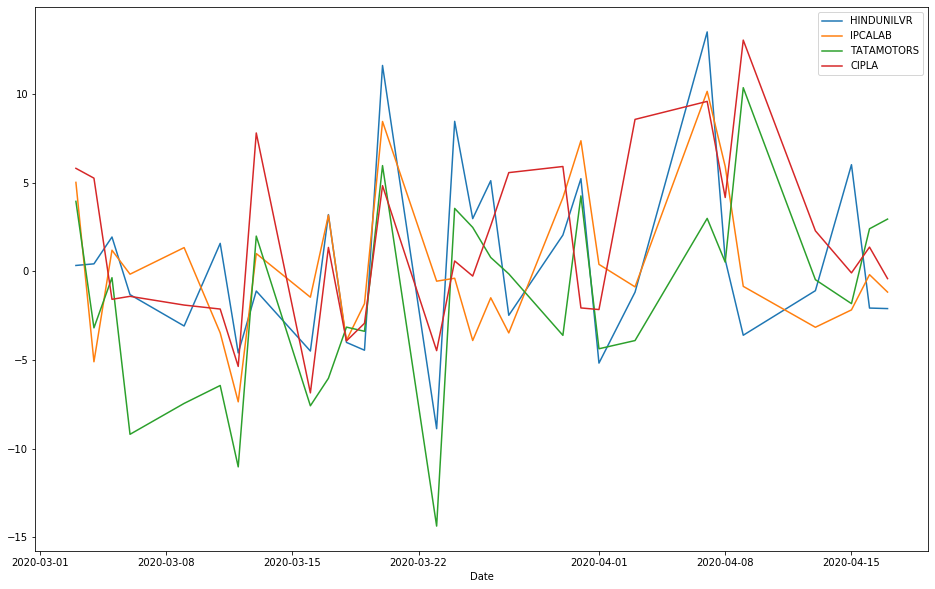

In [29]:
HINDUNILVR_series = HINDUNILVR['Close'][-30:].pct_change()[1:] * 100
HINDUNILVR_series.name = 'HINDUNILVR'

IPCALAB_series = IPCALAB['Close'][-30:].pct_change()[1:] * 100
IPCALAB_series.name = 'IPCALAB'

TATAMOTORS_series = TATAMOTORS['Close'][-30:].pct_change()[1:] * 100
TATAMOTORS_series.name = 'TATAMOTORS'

CIPLA_series = CIPLA['Close'][-30:].pct_change()[1:] * 100
CIPLA_series.name = 'CIPLA'

HINDUNILVR_series.plot()
IPCALAB_series.plot()
TATAMOTORS_series.plot()
CIPLA_series.plot()

plt.legend();

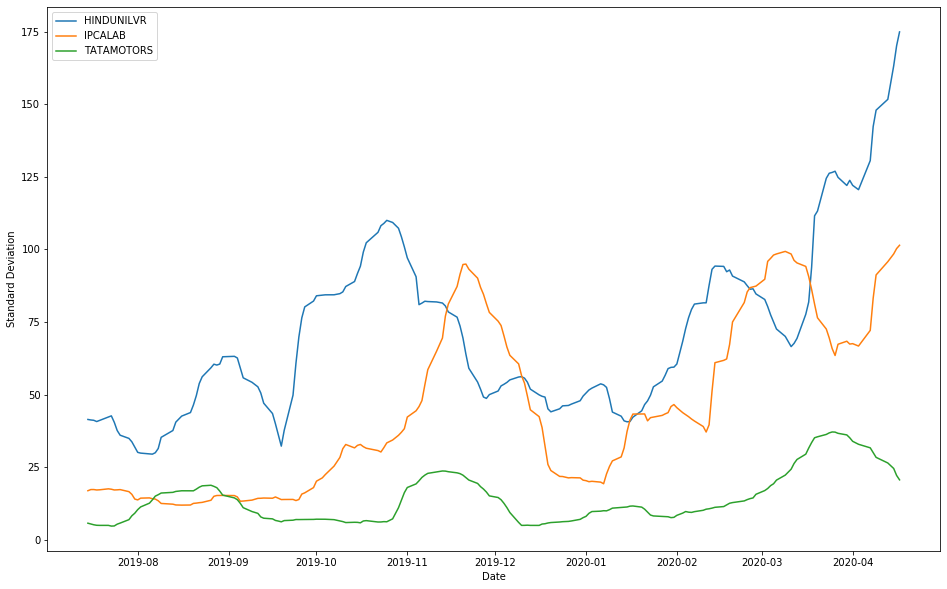

In [26]:
HINDUNILVR_rolling_std = HINDUNILVR['Close'].rolling(30).std()
HINDUNILVR_rolling_std.name = 'HINDUNILVR'
IPCALAB_rolling_std = IPCALAB['Close'].rolling(30).std()
IPCALAB_rolling_std.name = 'IPCALAB'
TATAMOTORS_rolling_std = TATAMOTORS['Close'].rolling(30).std()
TATAMOTORS_rolling_std.name = 'TATAMOTORS'

HINDUNILVR_rolling_std.plot()
IPCALAB_rolling_std.plot()
TATAMOTORS_rolling_std.plot()

plt.xlabel("Date")
plt.ylabel("Standard Deviation");

plt.legend();

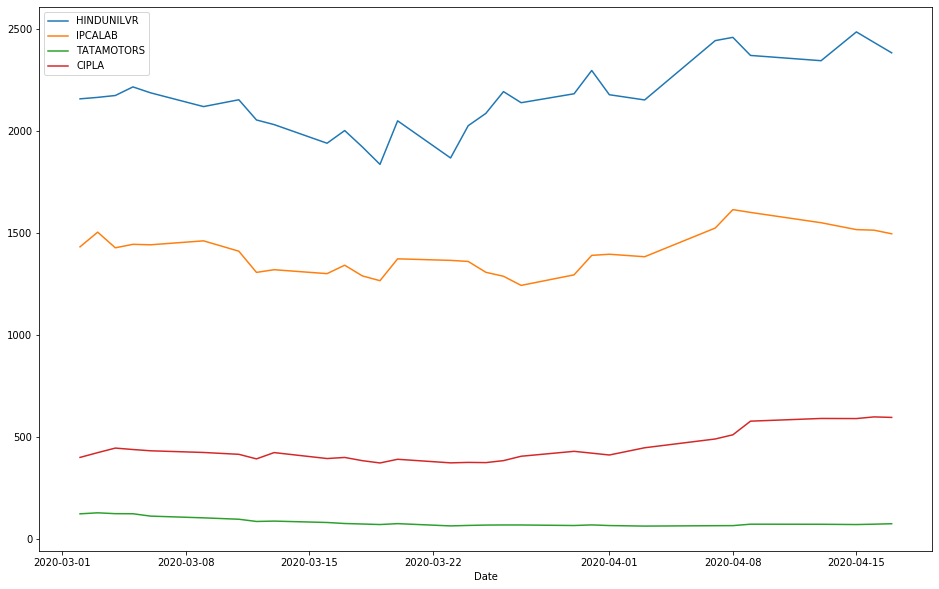

In [41]:
prices[-30:].plot()

In [42]:
mult_returns = prices.pct_change()[1:]

In [45]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)


In [46]:
norm_returns

,HINDUNILVR,IPCALAB,TATAMOTORS,CIPLA
Date,,,,
2019-06-04,-0.653064,0.278388,-0.102450,-0.446190
2019-06-06,0.482137,-0.502275,-0.431988,-0.239821
2019-06-07,-0.236179,0.517083,0.045533,-0.814358
2019-06-10,0.467803,-0.563867,-0.406727,0.374417
2019-06-11,-0.372880,-0.255895,0.751604,0.390236
...,...,...,...,...
2020-04-09,-1.680760,-0.452996,2.635115,5.596024
2020-04-13,-0.553264,-1.403757,-0.041335,0.963446
2020-04-15,2.632915,-0.999854,-0.374899,-0.057907


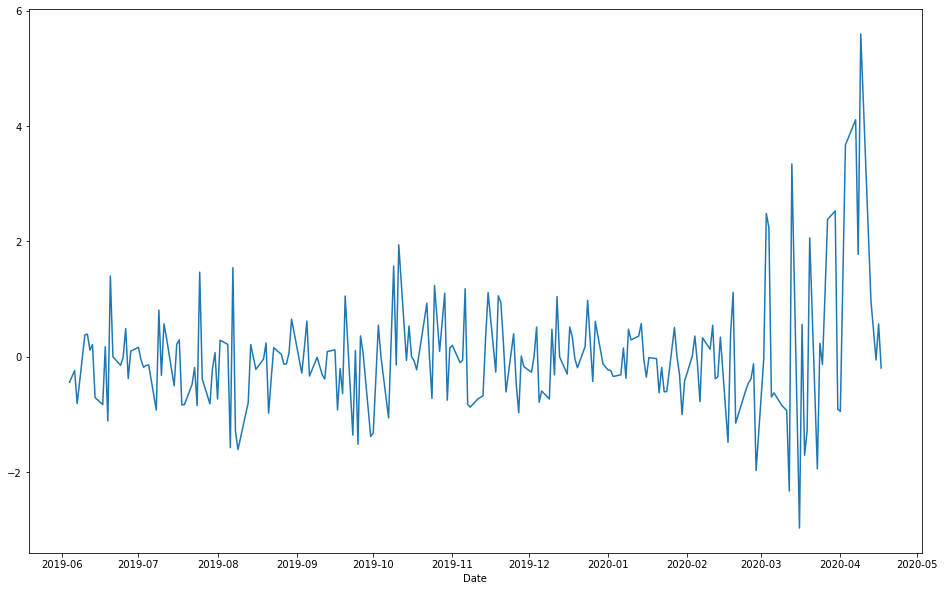

In [51]:
norm_returns['CIPLA'].loc[date(2019, 6, 1):date(2020, 4, 17)].plot();

In [53]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

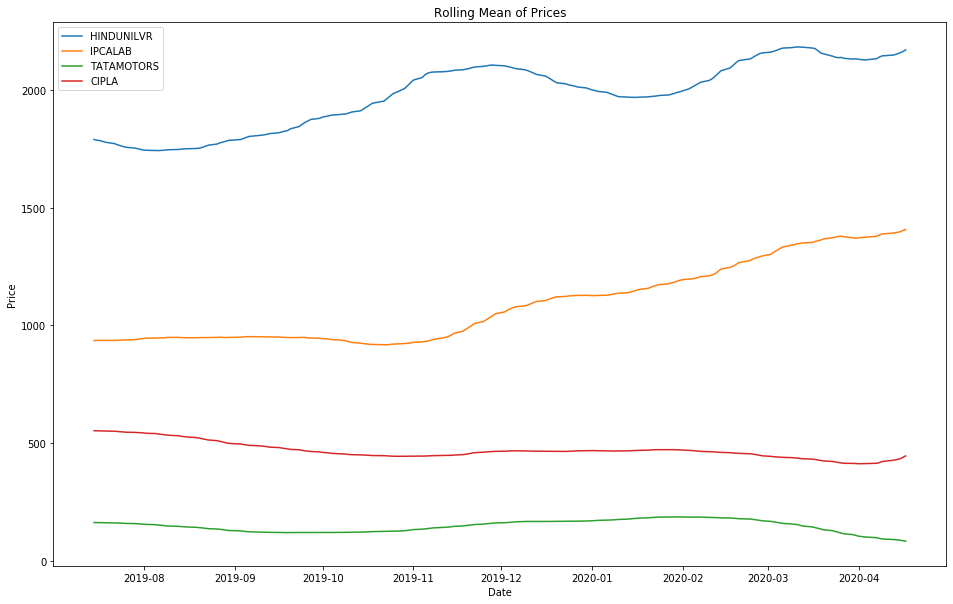

In [54]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

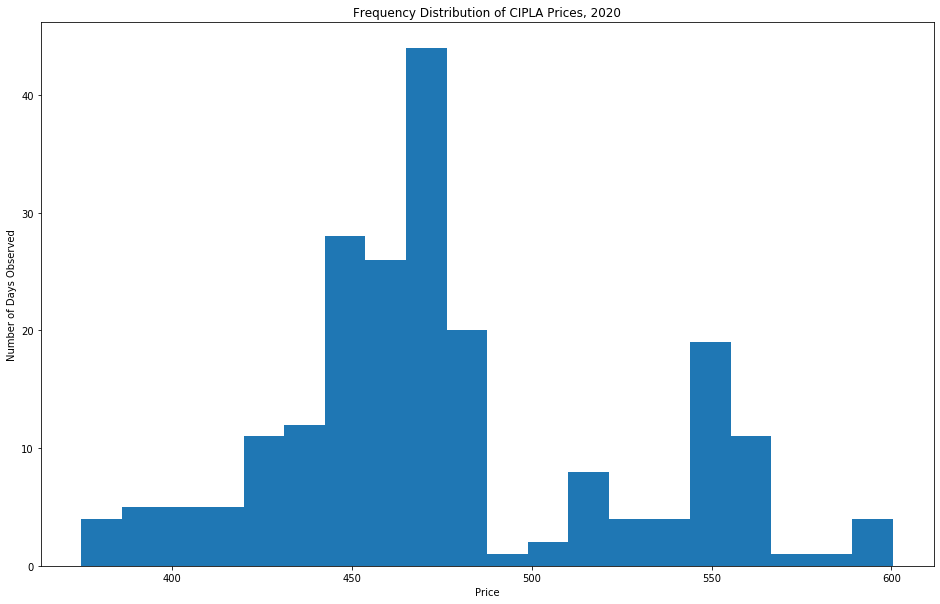

In [55]:
# Plot a histogram using 20 bins
plt.hist(prices['CIPLA'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of CIPLA Prices, 2020');

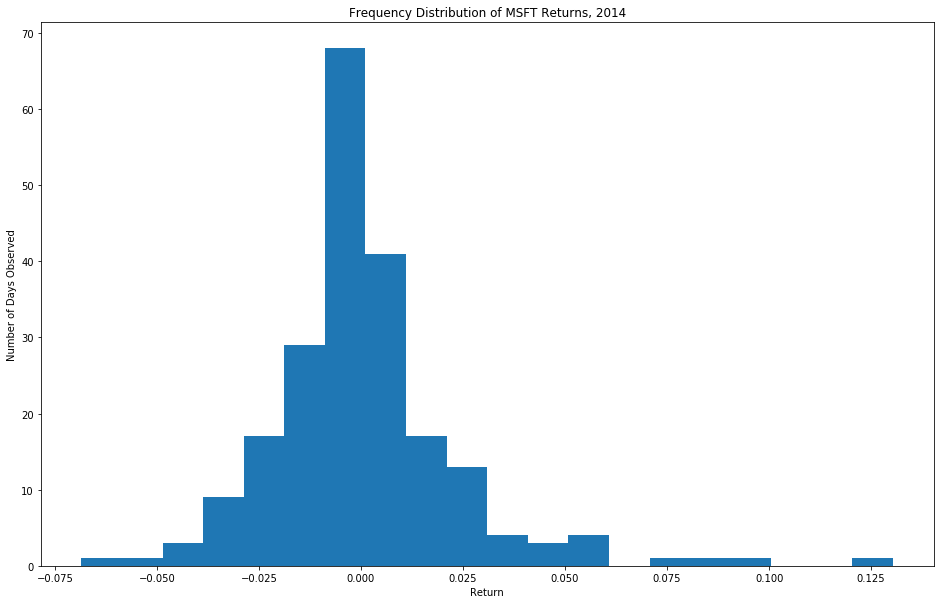

In [56]:
# Remove the first element because percent change from nothing to something is NaN
R = prices['CIPLA'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');